In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


In [3]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 871.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00


In [3]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [4]:
!ls -la {HOME}/weights

total 804880
drwxr-xr-x 2 root root      4096 May 12 10:29 .
drwxr-xr-x 1 root root      4096 May 12 09:13 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt.1


In [5]:
!ls -la {HOME}/customdata

total 48
drwxr-xr-x 5 root root  4096 May 12 10:14 .
drwxr-xr-x 1 root root  4096 May 12 09:13 ..
-rw-r--r-- 1 root root   125 May 12 10:11 data.yaml
drwxr-xr-x 2 root root  4096 May 12 09:14 images
drwxr-xr-x 2 root root  4096 May 12 09:13 .ipynb_checkpoints
drwxr-xr-x 2 root root  4096 May 12 09:14 labels
-rw-r--r-- 1 root root 21529 May 12 10:14 labels.cache


In [6]:
!python train_dual.py \
--batch 8 --epochs 40 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--weights /content/weights/yolov9-e.pt \
--cfg /content/yolov9/models/detect/yolov9-e.yaml \
--hyp hyp.scratch-high.yaml \
--data /content/customdata/data.yaml

2024-05-12 10:30:11.117679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 10:30:11.117732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 10:30:11.119280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-12 10:30:12.342333: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/weights/yolov9-e.pt, cfg=/content/yolov9/models/detect/yolov9-e.yaml, data=/content/customdata/data.yaml, hyp=hyp.scratch-high.yaml, epochs=40, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, nov

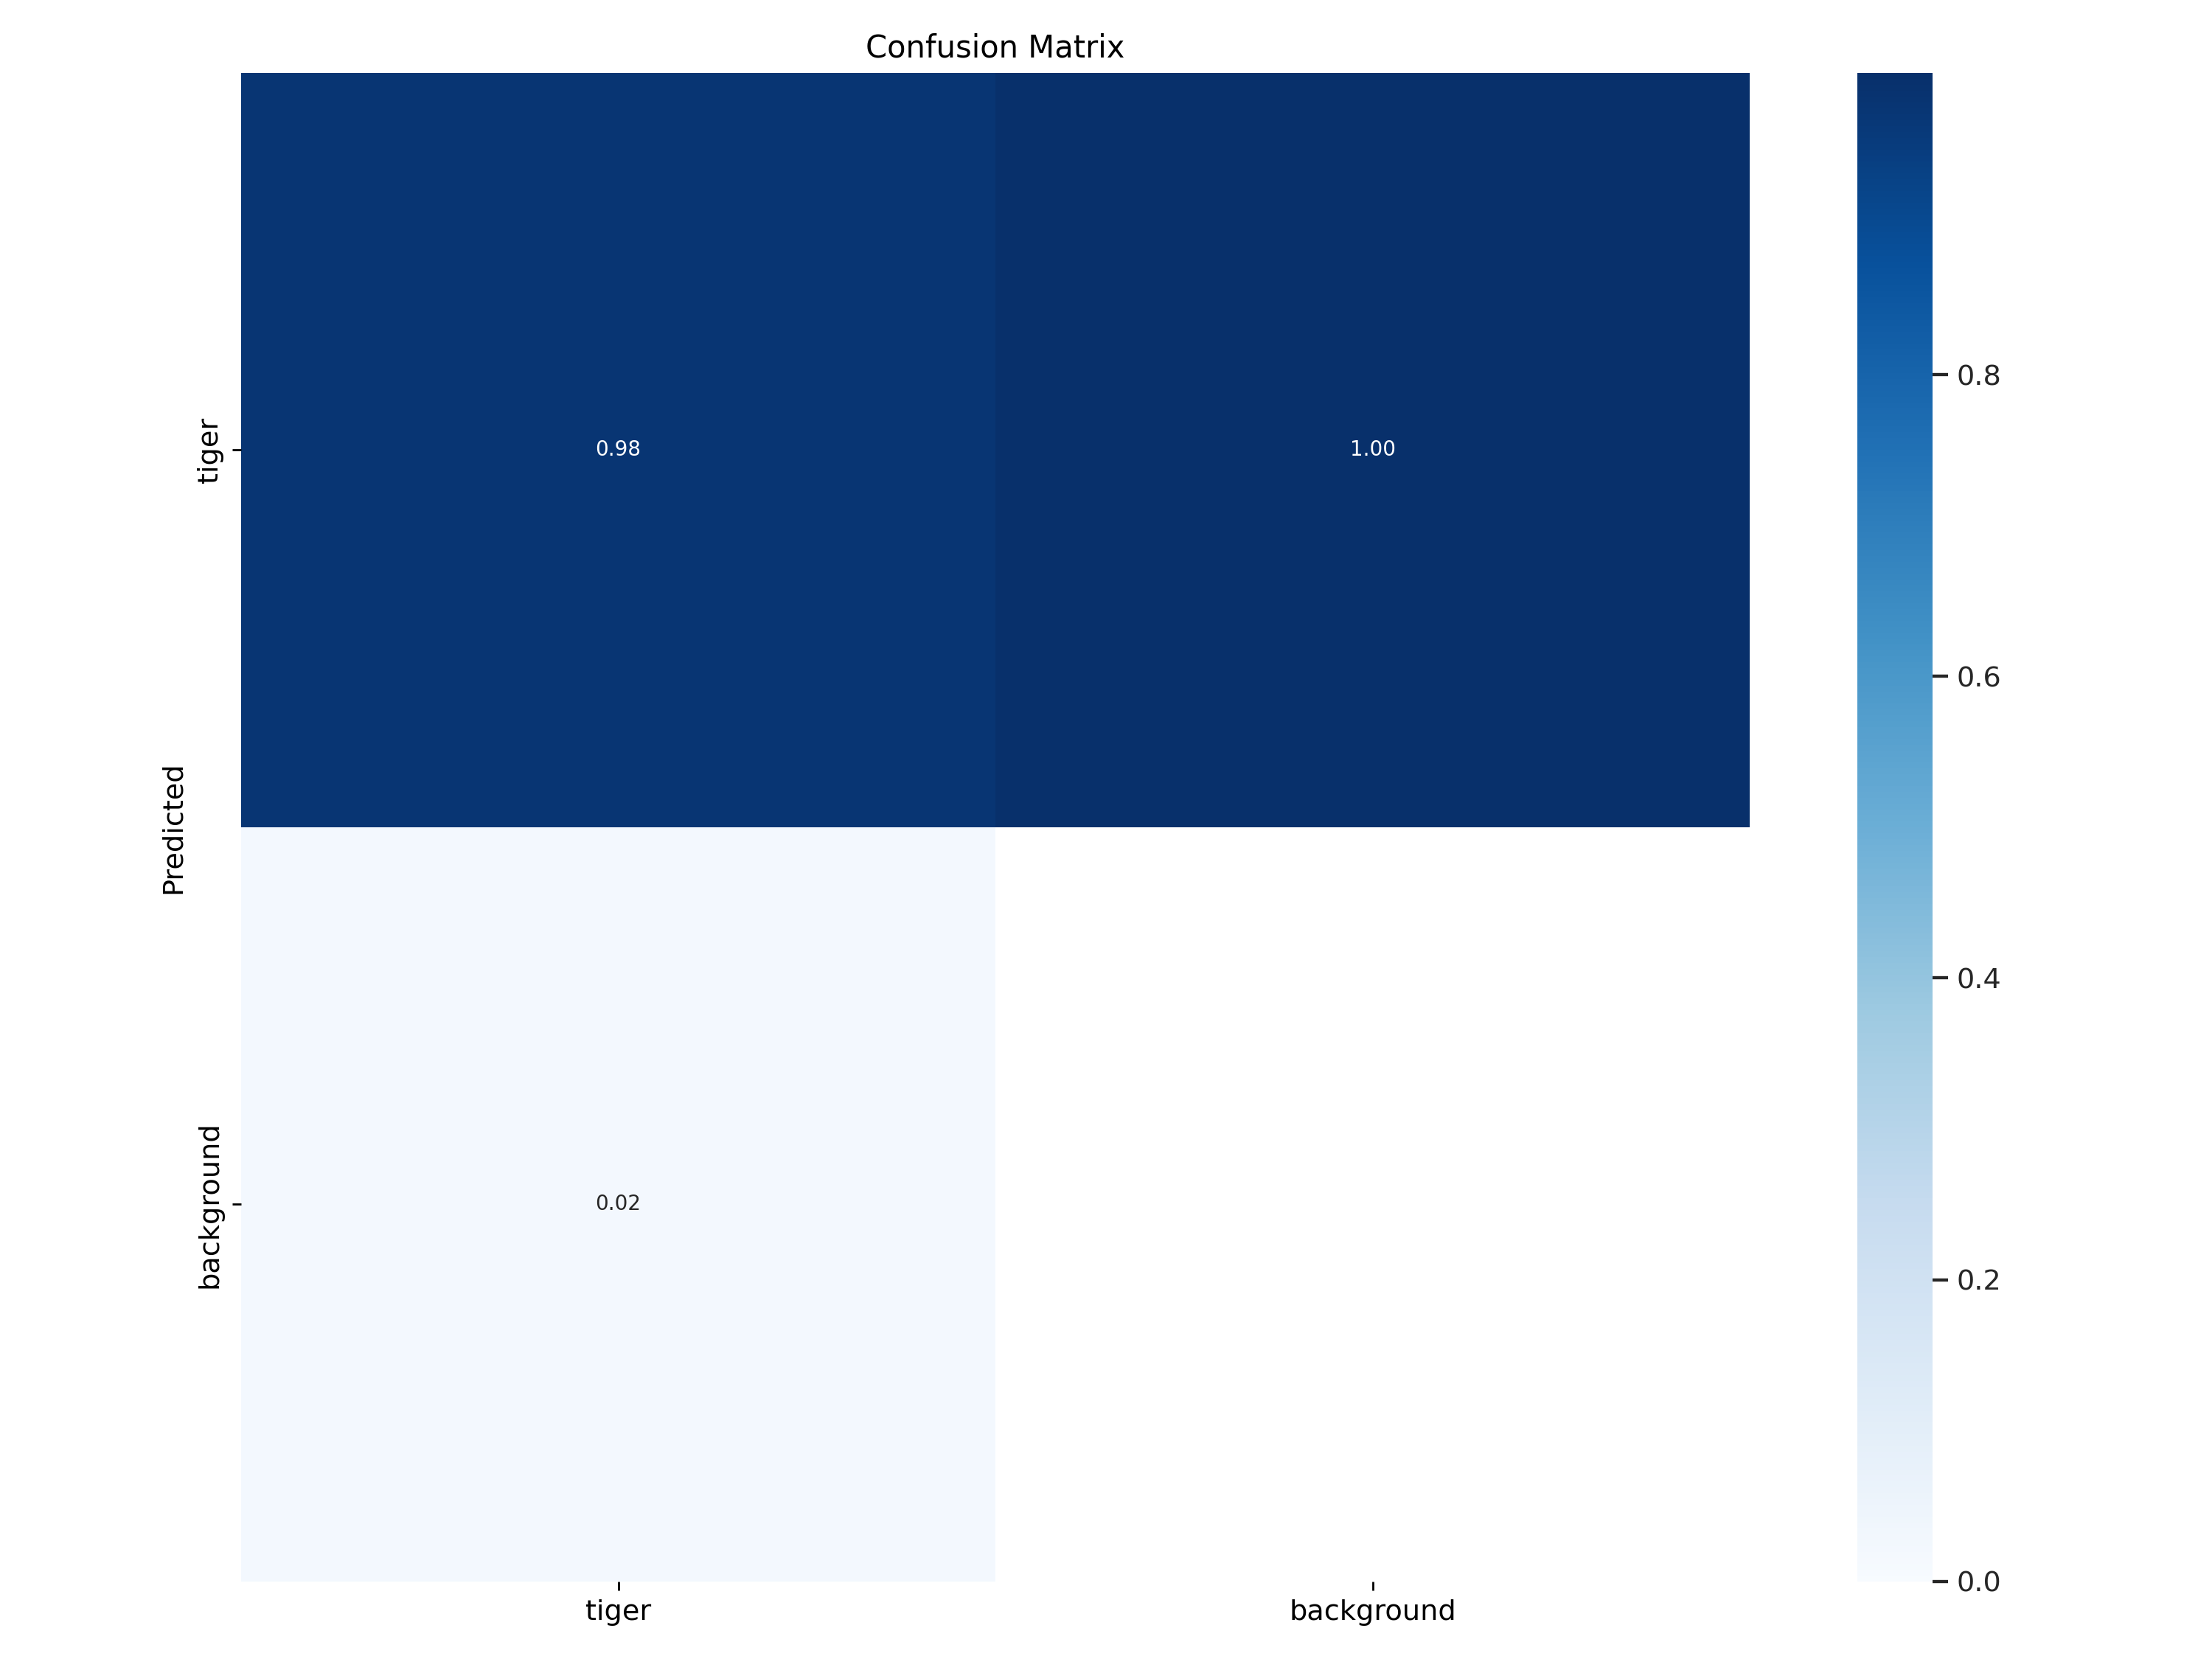

In [7]:
from IPython.display import Image
Image(filename=f"/content/yolov9/runs/train/exp15/confusion_matrix.png", width=1000)

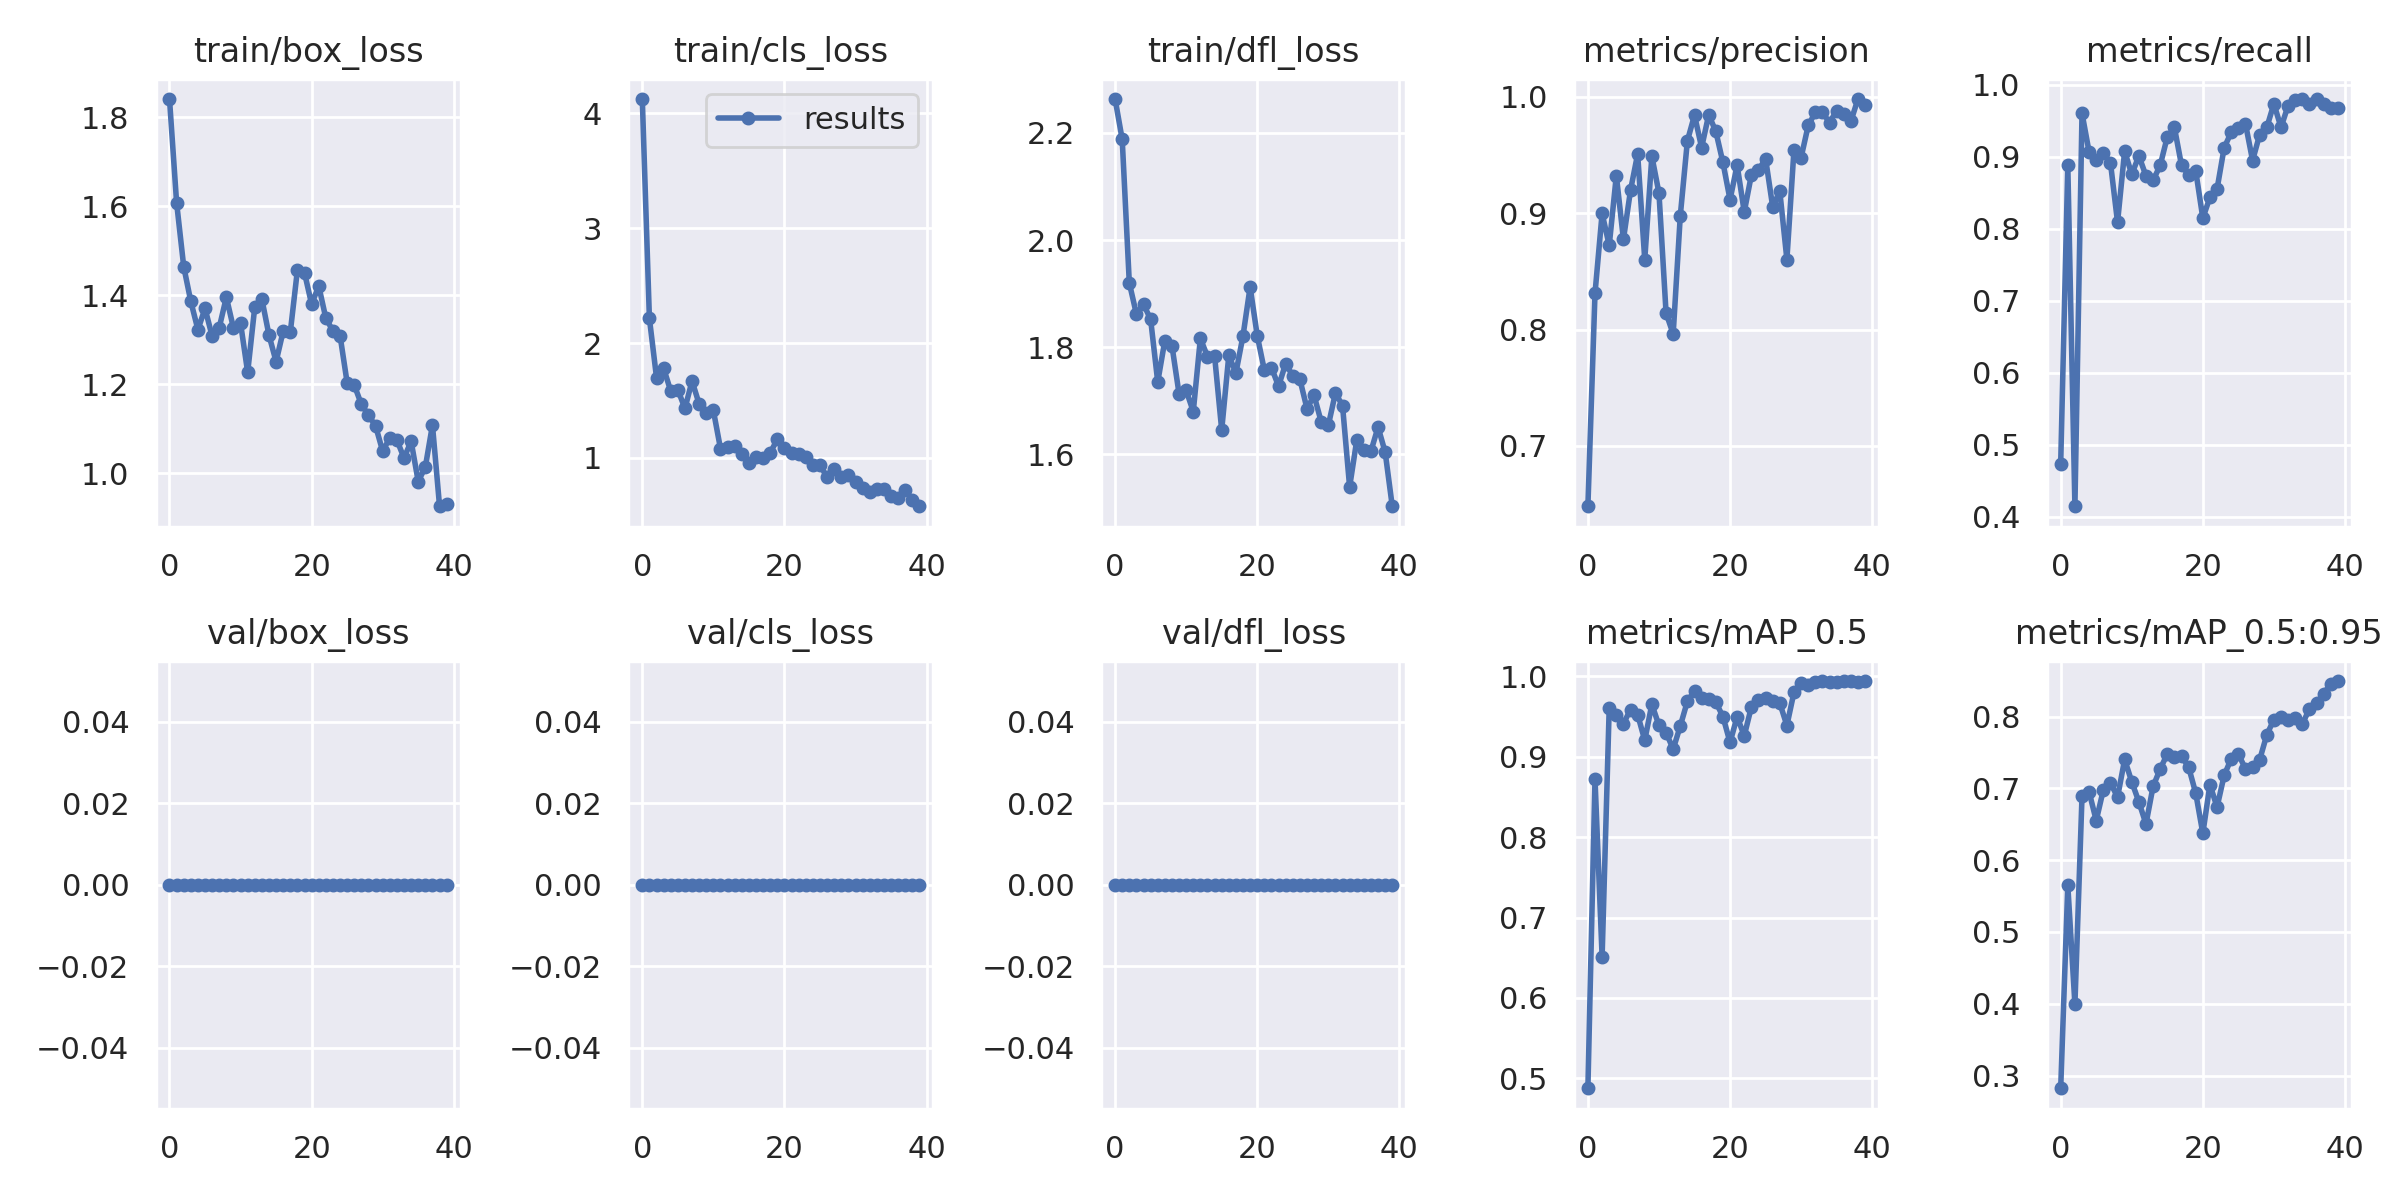

In [8]:
Image(filename=f"/content/yolov9/runs/train/exp15/results.png", width=1000)